In [143]:
import scipy
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**5.1**

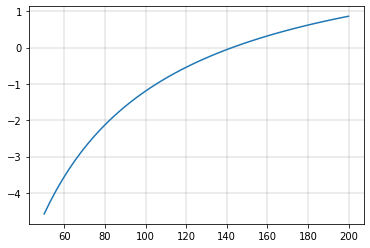

In [162]:
v = 36.0
cd = 0.25
g = 9.81
t = 4
m = np.linspace(50,200)

fm = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t) - v
plt.plot(m, fm)
plt.grid(color='gray', linestyle='-', linewidth=0.3)

In [180]:
def bissecao(f, a, b, TOL, N):  
    i = 1  
    fa = f(a)  
    while (i <= N):  
        
        #iteracao da bissecao  
        p = a + (b-a)/2  
        fp = f(p)  
        
        #condicao de parada  
        if ((fp == 0) or ((b-a)/2 < TOL)):  
            return p, i  
        
        #bissecta o intervalo  
        i = i+1  
        if (fa * fp > 0):  
            a = p  
            fa = fp  
        else:  
            b = p  
 
    return "Num. max. de iter. excedido!"

In [145]:
def bissec(f, xl, xu, stop):
    return opt.root_scalar(f,method='bisect',bracket=[xl,xu], rtol = stop) 
    

def func(cd):
    v = 36.0
    g = 9.81
    t = 4
    m = 80
    return np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t) - v


bissec(func, xl=0.1, xu=2.0, stop=0.02)


      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 10
           root: 0.13896484375

**5.5**

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 7
           root: -0.4140625 



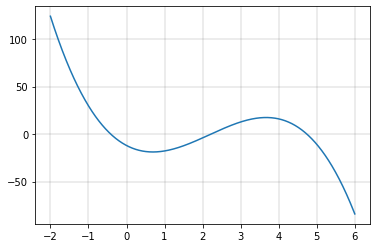

In [146]:
def g(x):
    return -12 - 21*x + 18*x**2 - 2.75*x**3

# a)


x = np.linspace(-2, 6, 1000)
plt.plot(x, g(x))
plt.grid(color='gray', linestyle='-', linewidth=0.3)


print(bissec(g, -1, 0, 0.02), "\n")

In [147]:
def falsaPosicao(f, xl, xu, stop):
    
    it = 0
    
    while(1):
        
        xr = xu - ( f(xu)*(xl - xu)/ (f(xl) - f(xu)) )
        erro = abs( (xr-xu)/xr*100 )
        it += 1
        
        if erro <= stop:
            break
        
        if (f(xl) * f(xr)) > 0:
            
            xl = xr

        else: 
            xu = xr
            
        
    return xr, it

In [148]:
falsaPosicao(g, -1, 0, 0.01)

(-0.4146769490926815, 8)

**5.8**

(0.9921875, 8)

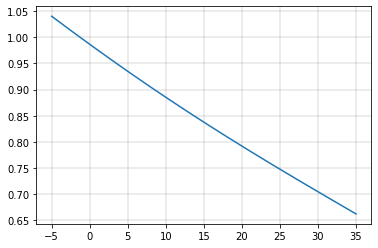

In [181]:
def h(t):
    ta = 273.15 + t
    sf = -139.34411 + (1.575701 *10**5/ta) - (6.642308*10**7/ta**2) + (1.243800*10**10/ta**3)-(8.621949*10**11/ta**4)
    return np.log(sf)

t = np.linspace(-5, 35, 1000)
plt.plot(t, h(t))
plt.grid(color='gray', linestyle='-', linewidth=0.3)

bissecao(h, -1, 1, 0.01, 100)

**São necessárias 8 interações**

In [150]:
def j(y):
    Q = 20
    g = 9.81
    B = 3 + y
    A = 3*y + (y**2)/2
    return 1 - ((Q**2)/(g*A**3))*B

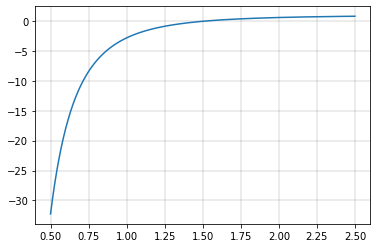

In [151]:
y = np.linspace(0.5, 2.5, 1000)
plt.grid(color='gray', linestyle='-', linewidth=0.3) 
plt.plot(y, j(y))

In [152]:
bissec(j, 0.5, 2.5, 0.01)

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 8
           root: 1.5078125

In [153]:
def falsaPosicao10(f, xl, xu, stop ):
    
    it = 0
    
    while(1):
        
        xr = xu - ( f(xu)*(xl - xu)/ (f(xl) - f(xu)) )
        erro = abs( (xr-xu)/xr*100 )
        it += 1
        
        if erro <= stop or it == 10:
            break
        
        if (f(xl) * f(xr)) > 0:
            
            xl = xr

        else: 
            xu = xr
            
        
    return xr, it

print(falsaPosicao(j, 0.5, 2.5, 0.01))
print(falsaPosicao10(j, 0.5, 2.5, 0.01))

(1.516106735668653, 94)
(2.0907660676945174, 10)


1. Usando o metodo gráfico com grade é possivel observar a raíz está próxima de 1.5 
2. Usando o metodo bissec chegamos na resposta com apenas 8 iterações
3. Usando o metodo da falsa posição chegamos praticamente no mesmo resultado com 94 iterações. Se limitarmos a função a 10 iterações possui um erro de aproximadamente 0.5 em módulo